In [1]:
from tdmclient import ClientAsync
from local_navigation import localNavigation
from global_navigation import GlobalNavigation

client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node d39ca52c-6d75-449e-96ee-13586c1312f5

In [2]:
from Vision import Vision
import time
from motion_control import MotionControl
from robot_api import Thymio
from global_navigation import GlobalNavigation
import numpy as np

In [3]:
#create vision module object
visio = Vision()
visio.begin()

Caméra initialisée sur le port 4


In [ ]:
visio.stop() #stop the visio module

In [4]:
t, g, o = visio.get_thymio_goal_and_obstacles() #get the lists you need
print(o)
print(g)
print(t)

[[[268, 132], [203, 246], [200, 299], [366, 299], [378, 255], [337, 159]], [[364, 0], [415, 82], [472, 0]]]
[np.float32(82.53115), np.float32(150.49841)]
[np.float32(378.71643), np.float32(165.79297), np.float32(-2.2822554)]


In [5]:
"""Point d'entrée principal"""
global_nav = GlobalNavigation()
Thymio = Thymio(node, client)
motion_control = MotionControl(Thymio)
local_navigation = localNavigation()



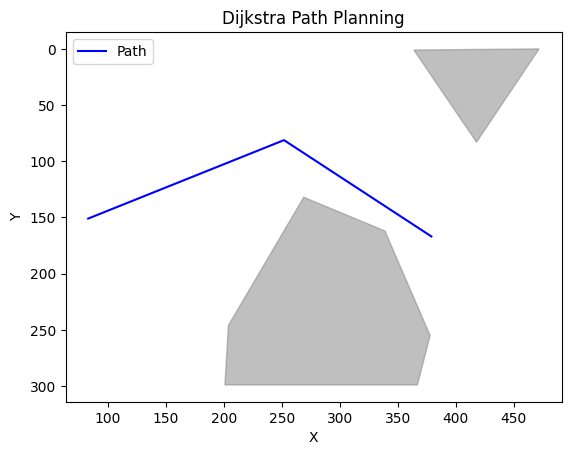

In [6]:
thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()

path, _, _ = global_nav.dijkstra(thymio, goal, obstacles)
visio.camera_feed.analysis.path = path.copy()
if path:
    global_nav.plot_path(path, obstacles)
else:
    print("No valid path found. Cannot plot.")

In [7]:
print(path)

[(379.0431823730469, 166.8458251953125), (251.93750643265747, 81.16879929477373), (83.0379409790039, 150.96478271484375)]


In [12]:
path.pop(0)
goal_point = path[0]
glob_loc = 0
speed = [0,0]

try:
    while True:
        prox_horizontal = motion_control.read_prox_sensors()
        glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
        #print(prox_horizontal)
       
        if(glob_loc == 0):
            glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
            if motion_control.path_tracking(thymio, goal_point):
                path.pop(0)
                if not path:
                    motion_control.set_motor_speed(0, 0)
                    break
                else:
                    goal_point = path[0]
            thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
        #if(glob_loc == 1):
        #    y = motion_control.get_motor_speed()
        #    speed = local_navigation.reactive_control(prox_horizontal, y)
        #    motion_control.set_motor_speed(speed[0], speed[1])
        #    glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
        #    if(glob_loc == 0):
        #        thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
        #        path, _, _ = global_nav.dijkstra(thymio, goal, obstacles)
    print("ARRIVED")



except KeyboardInterrupt:
    print("Stop the program")
finally:
    visio.stop()
    print("Program stops")

IndexError: pop from empty list

In [13]:
motion_control.set_motor_speed(0, 0)
#test

In [7]:
prox_horizontal = motion_control.read_prox_sensors()
print(prox_horizontal)

[0, 0, 0, 0, 0, 0, 0]
